# Notebook Python du Projet Mathématiques


Ce document présente les fonctions implémentées ainsi que les résultats de nos recherches sur le projet de mathématiques, dans le cadre de notre deuxième semestre à l'ENSIIE.

Groupe 20 :
- **Khalil BATTIKH**
- **Lucas RODRIGUEZ**
- **Avraham ROSENBERG**
---

In [40]:
# Importation des bibliothèques nécessaires

# Bibliothèque time pour établir des comparatifs de performances de nos implémentations
import time
# Bibliothèque random pour générer des échantillons aléatoires
import random
# Bibliothèque math pour avoir accès aux fonctions mathématiques
import math

# Bibliothèques numpy et scipy pour faciliter la gestion des données et du calcul numérique
import scipy.stats
import scipy as sp
import numpy as np

# Bibliothèque et sous-modules pour la représentation 2D/3D des données
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


# Pour ignorer les warnings de division par zéro pour le calcul d'erreur relative
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Modèle de Cox-Ross-Rubinstein

In [2]:
def binomial(n, k) :
    """
    Fonction implémentant le calcul du coefficient binomial
    :param n: entier
    :param k: entier
    """
    return (math.factorial(n))/(math.factorial(n - k)*math.factorial(k))

## Premier pricer

In [3]:
def price1(N, r_N, h_N, b_N, s, f):
    """
    Fonction implémentant le premier pricer étudié dans le
    modèle de Cox-Ross-Rubinstein
    :param N: Nombre de discrétisation souhaité
    :param r_N: Taux sans risque
    :param h_N: Taux pour un actif risqué, à l'initiative d'une hausse du prix de l'actif
    :param b_N: Taux pour un actif risqué, à l'initiative d'une baisse du prix de l'actif
    :param s: Prix de l'actif risqué à l'instant initial
    :param f: Fonction continue
    :return: Prix de l'option (que doit faire payer le vendeur à l'acheteur, à l'instant initial)
    """
    # Calcul de q_N
    q_N = (r_N - b_N)/(h_N - b_N)

    # Calcul du prix de l'option
    prix = 0
    for i in range(N + 1):
        s_i = s*((1 + h_N)**i)*((1 + b_N)**(N - i))
        prix += binomial(N, i)*f(s_i)*(q_N**i)*((1 - q_N)**(N - i))
    return prix*(1/(1 + r_N)**N)

In [4]:
# Fonction de payoff
f = lambda x: max(x - 100, 0)

# Test du premier pricer
s = 100
h_N = 0.05
b_N = -0.05
r_N = 0.01
N = 20
print(price1(N, r_N, h_N, b_N, s, f))

20.078658207286068


## Deuxième pricer

In [5]:
def price2(N, r_N, h_N, b_N, s, f):
    """
    Fonction implémentant le second pricer
    :param N: Nombre de discrétisation souhaité
    :param r_N: Taux sans risque
    :param h_N: Taux pour un actif risqué, à l'initiative d'une hausse du prix de l'actif
    :param b_N: Taux pour un actif risqué, à l'initiative d'une baisse du prix de l'actif
    :param s: Prix de l'actif risqué à l'instant initial
    :param f: Fonction continue
    :return: Prix de l'option (que doit faire payer le vendeur à l'acheteur, à l'instant initial)
    :return:
    """
    # Calcul de q_N
    q_N = (r_N - b_N)/(h_N - b_N)

    # Création des vecteurs V_k
    V_size = N + 1
    V = np.zeros((V_size, V_size))

    # Détermination des prix à l'étape N
    for i in range(N + 1):
        V[i][0] = f(s*((1 + b_N)**i)*((1 + h_N)**(N - i)))
    # On remonte ensuite les prix précédents en remontant l'arbre par récurrence
    for j in range(1, N + 1):
        for i in range(j, N + 1):
            V[i][j] = (1/(1 + r_N))*(q_N*V[i - 1][j - 1] + (1 - q_N)*V[i][j - 1])
            
    # Affichage (pour le développement) de la matrice V
    #print(V)
    return V[N][N]

In [6]:
# Test du second pricer
f = lambda x: max(100 - x, 0)
N = 3
print(price2(N, r_N, h_N, b_N, s, f))

2.349992866162413


## Comparaison des 2 pricers

In [7]:
# Comparaison des 2 pricers
s = 100
r_N = 0.01
h_N = 0.05
b_N = -0.05
N = 3  # random.randint(5, 15)
f2 = lambda x:max(x - 100, 0)
print("Etude comparative des 2 pricers pour N = ", N)

p1 = price1(N, r_N, h_N, b_N, s, f2)
p2 = price2(N, r_N, h_N, b_N, s, f2)
print("Premier pricer : ", p1)
print("Second pricer : ", p2)

# Mesure de l'écart entre les 2
print("\nEcart absolu entre les 2 pricers")
print(abs(p1 - p2))

Etude comparative des 2 pricers pour N =  3
Premier pricer :  5.2909780733979686
Second pricer :  5.290978073397971

Ecart absolu entre les 2 pricers
2.6645352591003757e-15


## Couverture

In [8]:
## Calcul de couverture

# Déclaration des paramètres
N = 2
s = 100
r_N = 0.03
h_N = 0.05
b_N = - h_N
f = lambda x:max(x - 100, 0)

# Calcul de q_N
q_N = (r_N - b_N)/(h_N - b_N)

### Couverture à $t = 0$

In [9]:
# Couverture à t = 0

# Calcul des coordonnées de v_1
v_1_h_N = (1/(1 + r_N))*(f(s*(1 + h_N)**2)*q_N + f(s*(1 + h_N)*(1 + b_N))*(1 - q_N))
v_1_b_N = (1/(1 + r_N))*(f(s*(1 + h_N)*(1 + b_N))*q_N + f(s*(1 + b_N)**2)*(1 - q_N))

alpha_0 = (1/((b_N - h_N)*s))*(v_1_b_N - v_1_h_N)
beta_0 = (1/((b_N - h_N)*(1 + r_N)))*(v_1_h_N*(b_N + 1) - v_1_b_N*(1 + h_N))

print("alpha 0 = ", alpha_0)
print("beta 0 = ", beta_0)

alpha 0 =  0.7961165048543689
beta 0 =  -73.42822132151944


### Couverture à $t = 1$ avec $S^{(N)}_{t_1} = s(1 + h_N)$

In [10]:
# Couverture à t = 1 pour S^(N)_t_{n + 1} = s(1 + h_N)
S = s*(1 + h_N)
alpha_1 = (1/((b_N - h_N)*S))*(f((1 + b_N)*S) - f((1 + h_N)*S))
beta_1 = (1/((b_N - h_N)*((1 + r_N)**2)))*(f((1 + h_N)*S)*(b_N + 1) - f((1 + b_N)*S)*(1 + h_N))

print("alpha 1 = ", alpha_1)
print("beta 1 = ", beta_1)

alpha 1 =  0.9761904761904762
beta 1 =  -91.78527665189931


### Couverture à $t = 1$ avec $S^{(N)}_{t_1} = s(1 + b_N)$

In [11]:
# Couverture à t = 1 pour S^(N)_t_{n + 1} = s(1 + b_N)
S = s*(1 + b_N)
alpha_1 = (1/((b_N - h_N)*S))*(f((1 + b_N)*S) - f((1 + h_N)*S))
beta_1 = (1/((b_N - h_N)*((1 + r_N)**2)))*(f((1 + h_N)*S)*(b_N + 1) - f((1 + b_N)*S)*(1 + h_N))

print("alpha 1 = ", alpha_1)
print("beta 1 = ", beta_1)

alpha 1 =  -0.0
beta 1 =  -0.0


# Modèle de Black-Scholes

## Pricer par méthode de Monte-Carlo

In [12]:
def price3(n, s, r, sigma, T, f):
    """
    Fonction implémentant le troisième pricer
    (modèle de Monte-Carlo) et renvoyant un estimateur du prix de l'option
    :param n:
    :param s:
    :param r:
    :param sigma:
    :param T:
    :param f:
    """
    # Génération de l'échantillon gaussien iid
    ksi = scipy.stats.norm.rvs(0, 1, n)
    # Calcul du prix mc
    prix_mc = 0
    for i in range(n):
        prix_mc += np.exp(-r*T)*f(s*np.exp((r - ((sigma**2)/2))*T + sigma*np.sqrt(T)*ksi[i]))
    prix_mc *= (1/n)
    return prix_mc

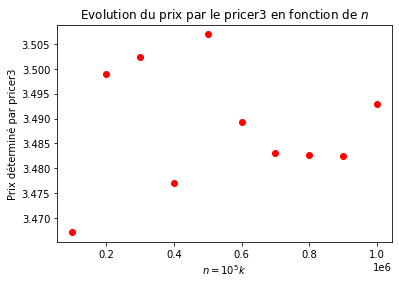

In [13]:
# Test de price3
r = 0.01
sigma = 0.1
s = 100
T = 1
f = lambda x:max(100 - x, 0)
n = [k*10**5 for k in range(1, 11)]

prices = []
for k in n:
    p = price3(k, s, r, sigma, T, f)
    prices.append(p)

plt.scatter(n, prices, color='red')
plt.xlabel("$n = 10^5k$")
plt.ylabel("Prix déterminé par pricer3")
plt.title("Evolution du prix par le pricer3 en fonction de $n$")
plt.savefig("evol_pricer3.png")
plt.show()

## Pricer par formule fermée

In [14]:
def put(s, r, sigma, T, K):
    """
    Formule renvoyant le prix de cette option
    :param s:
    :param r:
    :param sigma:
    :param T:
    :param K:
    """
    d = (1/(sigma*np.sqrt(T)))*(np.log(s/K) + (r + (sigma**2)/2)*T)
    
    def F(x):
        return scipy.stats.norm.cdf(x, 0, 1)

    prix_bs = -s*F(-d) + K*np.exp(-r*T)*F(-d + sigma*np.sqrt(T))
    return prix_bs

In [15]:
# Test du put
r = 0.01
sigma = 0.1
s = 100
T = 1
K = 90
put(s, r, sigma, T, K)

0.5815000751362422

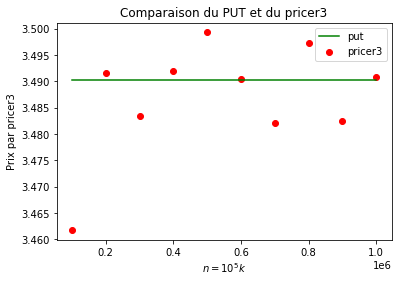

In [17]:
# Comparaison de put et price 3
r = 0.01
sigma = 0.1
s = 100
T = 1
K = 100
f = lambda x: max(K - x, 0)
N = [k*10**5 for k in range(1, 11)]
P = [price3(n, s, r, sigma, T, f) for n in N]

# Affichage du pricer3
plt.scatter(N, P, color= 'red', label='pricer3')
# Affichage du put
p = put(s, r, sigma, T, K)
plt.plot(N, p*np.array([1 for k in range(1, 11)]), color='green', label='put')

# Configuration de l'affichage
plt.xlabel("$n = 10^5k$")
plt.ylabel("Prix par pricer3")
plt.title("Comparaison du PUT et du pricer3")
plt.legend()
#plt.savefig("compaPUT_P3.png")
plt.show()

### [Complément] Analyse de convergence asymptotique

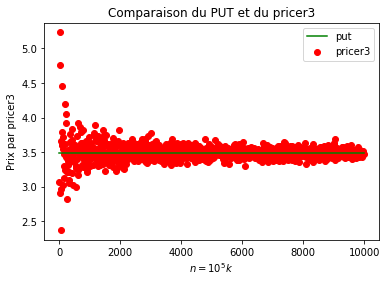

In [18]:
# Comparaison de put et price 3
r = 0.01
sigma = 0.1
s = 100
T = 1
n = 1000
K = 100
f = lambda x: max(K - x, 0)
N = [k*10 for k in range(1, n)]
P = [price3(n, s, r, sigma, T, f) for n in N]

# Affichage du pricer3
plt.scatter(N, P, color= 'red', label='pricer3')
# Affichage du put
p = put(s, r, sigma, T, K)
plt.plot(N, p*np.array([1 for k in range(1, n)]), color='green', label='put')

# Configuration de l'affichage
plt.xlabel("$n = 10^5k$")
plt.ylabel("Prix par pricer3")
plt.title("Comparaison du PUT et du pricer3")
plt.legend()
#plt.savefig("compaPUT_P3_conv2.png")
plt.show()

In [ ]:
# Tracé 3D (Question 18)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
r = 0.01
sigma = 0.1
K = 100
S = [20*k for k in range(1, 11)]
T = [1/12, 1/6, 1/4, 1/3, 1/2, 1]

for s in S:
    for t in T:
        p = put(s, r, sigma, t, K)
        ax.scatter(s, t, p, color="red", s=20)
        
# Configuration de l'affichage du graphique
ax.set_xlabel("$s$")
ax.set_ylabel("$T$")
ax.set_zlabel("PUT")
plt.title("Prix de l'option (fonction put)")
#plt.savefig("18_graph3D_put.png")
plt.show()

# Convergence des prix

In [ ]:
f = lambda x: max(100 - x, 0)
s = 100
sigma = 0.3
r = 0.02
T = 1
N_liste = [10*k for k in range(1, 101)]
K = 100
p2 = []

for N in N_liste: # Fonction max(100 - x, 0)
    r_N = (r*T)/N
    h_N = (1 + r_N)*np.exp(sigma*np.sqrt(T/N)) - 1
    b_N = (1 + r_N)*np.exp(- sigma*np.sqrt(T/N)) - 1
    p = price2(N, r_N, h_N, b_N, s, f)
    p2.append(p)

# Configuration du graphique
plt.plot(N_liste, p2, color='red', label='pricer')
plt.scatter(N_liste, p2, color='orange', s=13)  
plt.plot(N_liste, put(s, r, sigma, T, K)*np.array([1 for k in range(1, 101)]), color='green', label='put')
plt.legend()
plt.xlabel("$N$")
plt.ylabel("Valeur du pricer")
plt.title("Prix de l'option via le pricer 2 par rapport au put en fonction de $N$")
#plt.savefig("convergence_f_max.png")
plt.show()

# EDP de Black-Scholes

In [21]:
# Déclaration des variables paramètres
K = 1
r = 0.015
sigma = 0.21
T = 1
x_min = np.log(0.4)
x_max = np.log(2)


alpha = -(sigma**2)/2
beta = (sigma**2)/2 - r
gamma = r

## Différences finies par schéma explicite

### Implémentation de la méthode

In [99]:
# Déclarations des nombres de points pour la discrétisation
M = 100 # Nombre de points en temps
N = 100 # Nombre de points en espace


# Déclaration des pas spatial et temporel
h = (x_max - x_min)/N
dt = (h**2)/2  # pour la stabilité
#dt = T/M # pour les instabilités


# Création de la matrice des p(t_m, x_j)
P = np.zeros((M, N))


# Discrétisation de l'espace-temps
X_liste = np.linspace(x_min, x_max, N)
T_liste = np.linspace(0, T, M)


# Conditions initiales
for i in range(1,N-1):
    P[0][i] = max(K - np.exp(X_liste[i]), 0)


# Conditions aux limites
for t in range(M):
    P[t][0] = K*np.exp(-r*T_liste[t]) - np.exp(x_min)
    P[t][-1] = 0

# Calcul des coefficients
a1 = dt*(1/dt + (2*alpha)/(h**2) - gamma)
a2 = dt*(-alpha/(h**2) - beta/(2*h))
a3 = dt*(-alpha/(h**2) + beta/(2*h))

# Implémentation itérative du schéma

P_m = np.zeros(N) # Vecteur colonne

for t in range(N - 1):
    # Réimplémentation des conditions aux limites
    P_m[0] = K*np.exp(-r*T_liste[t]) - np.exp(x_min)
    P_m[-1] = 0
    
    # Itération sur le vecteur colonne et sur les vecteurs colonnes précédents
    for x in range(1, M - 1):
        P_m[x] = a1*P[t][x] + a2*P[t][x + 1] + a3*P[t][x - 1]
    # Implantation du vecteur colonne récemment calculé dans la matrice générale
    P[t + 1] = P_m.copy()
P_E = np.copy(P[-1, :])

### Affichage de l'évolution du PUT $p(t, x)$ en fonction de $x$

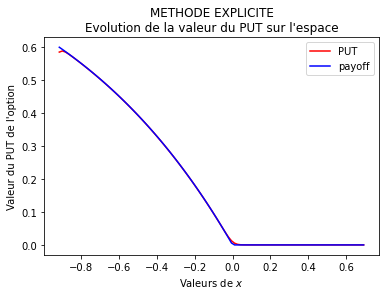

In [35]:
# Affichage de l'évolution du PUT en fonction de x
plt.plot(X_liste, P[-1, :], color="red", label="PUT")
plt.plot(X_liste, np.fmax(K - np.exp(X_liste), 0), color = "blue", label = "payoff")

# Configurations
plt.xlabel("Valeurs de $x$")
plt.ylabel("Valeur du PUT de l'option")
plt.title("METHODE EXPLICITE\nEvolution de la valeur du PUT sur l'espace")
plt.legend()
plt.show()

### Affichage de l'évolution du PUT $p(t, x)$ en fonction de $t$ et $x$ (3D)

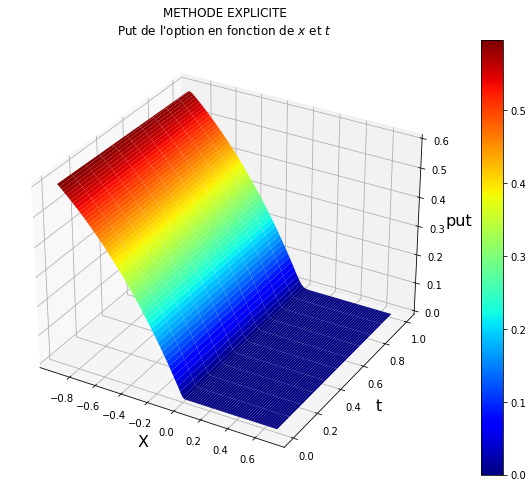

In [37]:
# Affichage de l'évolution du PUT p(t, x) en fonction de t et x

# Configuration du graphique
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize = 16)
ax.set_ylabel('t', fontsize = 16)
ax.set_zlabel('put', fontsize = 16)

# Création & Affichage du graphique
X_liste_m, T_liste_m = np.meshgrid(X_liste, T_liste)
p = ax.plot_surface(X_liste_m, T_liste_m, P,cstride=1,linewidth=0,cmap='jet')
cb = fig.colorbar(p, ax=ax)
plt.title("METHODE EXPLICITE\nPut de l'option en fonction de $x$ et $t$")
#plt.savefig("E_3D.png")
plt.show()

### Affichage du PUT $p(t, x)$ en fonction de $t$ et $x$ en vue 2D (heatmap)

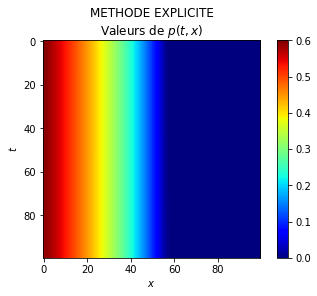

In [38]:
# Affichage en altitude
plt.imshow(P, cmap="jet")
plt.xlabel("$x$")
plt.ylabel("$t$")
plt.title("METHODE EXPLICITE\nValeurs de $p(t,x)$")
plt.colorbar()
plt.savefig("E_headmap.png")
plt.show()

### Erreur relative de la méthode

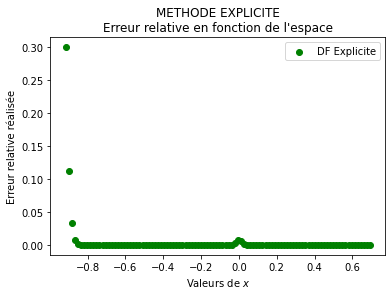

In [97]:
err_abs_e =  np.absolute(P[-1, :] - np.fmax(K - np.exp(X_liste), 0))
err_rel_e = err_abs_e/np.fmax(K - np.exp(X_liste), 0)

# Affichage de l'évolution de l'erreur relative en fonction de x
plt.scatter(X_liste, err_abs_e, color="green", label="DF Explicite")
plt.title("METHODE EXPLICITE\nErreur relative en fonction de l'espace")
plt.legend()
plt.xlabel("Valeurs de $x$")
plt.ylabel("Erreur relative réalisée")
plt.show()

## Différences finies par schéma implicite

### Implémentation

In [130]:

# Déclarations des nombres de points pour la discrétisation
M = 100 # Nombre de points en temps
N = 100 # Nombre de points en espace


# Déclaration des pas spatial et temporel
h = (x_max - x_min)/N
dt = (h**2)/2  # pour la stabilité
#dt = T/M # pour les instabilités

# Calcul des coefficients
b1 = (dt)*(1/dt - (2*alpha)/(h**2) + gamma)
b2 = (dt)*(alpha/(h**2) + beta/(2*h))
b3 = (dt)*(alpha/(h**2) - beta/(2*h))

# Création de la matrice des p(t_m, x_j)
P = np.zeros((M, N))
A = np.zeros((N, N))


# Remplissage de la matrice A
for i in range(N):
    A[i][i] = b1
    
for i in range(0, N - 1):
    A[i][i + 1] = b2
    
for i in range(1, N):
    A[i][i - 1] = b3

# Inversion de la matrice
A_inv = np.linalg.inv(A) 
    
# Discrétisation de l'espace-temps
X_liste = np.linspace(x_min, x_max, N)
T_liste = np.linspace(0, T, M)


# Conditions initiales
for i in range(1, N-1):
    P[0][i] = max(K - np.exp(X_liste[i]), 0)

# Conditions aux limites
for t in range(M):
    P[t][0] = K*np.exp(-r*T_liste[t]) - np.exp(x_min)
    P[t][-1] = 0

    
# Implémentation du schéma
for t in range(M - 1):
    P[t + 1, :] = np.dot(A_inv, P[t, :])
P_I = np.copy(P[-1, :])

### Affichage de l'évolution du PUT $p(t, x)$ en fonction de $x$

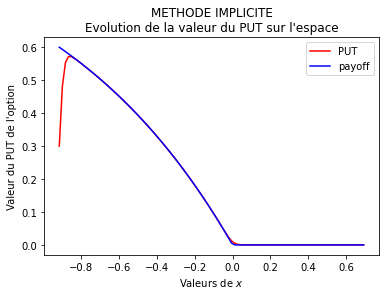

In [131]:
# Affichage de l'évolution du PUT en fonction de x
plt.plot(X_liste, P[- 1, :], color="red", label="PUT")
plt.plot(X_liste, np.fmax(K - np.exp(X_liste), 0), color = "blue", label = "payoff")
plt.xlabel("Valeurs de $x$")
plt.ylabel("Valeur du PUT de l'option")
plt.title("METHODE IMPLICITE\nEvolution de la valeur du PUT sur l'espace")
plt.legend()
#plt.savefig("I_px.png")
plt.show()

### Affichage de l'évolution du PUT $p(t, x)$ en fonction de $t$ et $x$ (3D)

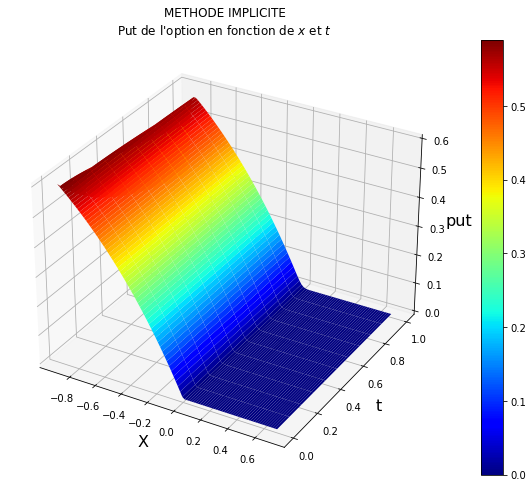

In [93]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize = 16)
ax.set_ylabel('t', fontsize = 16)
ax.set_zlabel('put', fontsize = 16)
X_liste_m, T_liste_m = np.meshgrid(X_liste, T_liste)
p = ax.plot_surface(X_liste_m, T_liste_m, P,cstride=1,linewidth=0,cmap='jet')
cb = fig.colorbar(p, ax=ax)
plt.title("METHODE IMPLICITE\nPut de l'option en fonction de $x$ et $t$")
#plt.savefig("I_3D.png")
plt.show()

### Affichage du PUT $p(t, x)$ en fonction de $t$ et $x$ en vue 2D (heatmap)

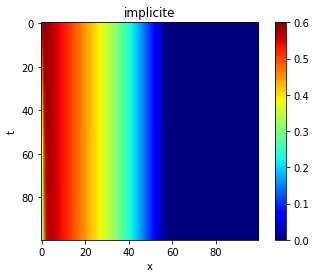

In [94]:
# Affichage en altitude
plt.imshow(P, cmap="jet") #cm.spring)
plt.xlabel("x")
plt.ylabel("t")
plt.title("implicite")
plt.colorbar()
plt.savefig("I_heatmap.png")
plt.show()

### Erreur relative de la méthode

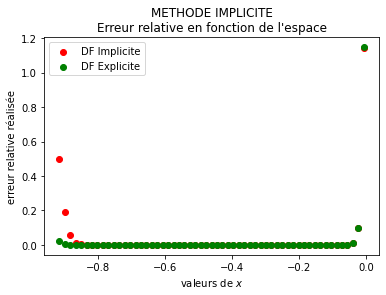

In [95]:
err_abs_i = np.absolute(P[-1, :] - np.fmax(K - np.exp(X_liste), 0))
err_rel_i = err_abs_i/np.fmax(K - np.exp(X_liste), 0)

# Affichage de l'évolution de l'erreur relative en fonction de x
plt.scatter(X_liste, err_rel_i, color="red", label="DF Implicite")
plt.scatter(X_liste, err_rel_e, color="green", label="DF Explicite")
plt.title("METHODE IMPLICITE\nErreur relative en fonction de l'espace")
plt.legend()
plt.xlabel("valeurs de $x$")
plt.ylabel("erreur relative réalisée")
plt.show()

## Différences finies par méthode de Crank-Nicholson $\theta = \frac{1}{2}$

### Implémentation

In [132]:
# Déclarations des nombres de points pour la discrétisation
M = 100 # Nombre de points en temps
N = M # Nombre de points en espace


# Déclaration des pas spatial et temporel
h = (x_max - x_min)/N
dt = (h**2)/2  # pour la stabilité
#dt = T/M # pour les instabilités

# Calcul des coefficients
c1 = 1/dt - alpha/(h**2) + gamma/2
c2 = alpha/(2*(h**2)) + beta/(4*h)
c3 = alpha/(2*(h**2)) - beta/(4*h)
c4 = 1/dt + alpha/(h**2) - gamma/2
c5 = -c2
c6 = -c3


# Création de la matrice des p(t_m, x_j)
P = np.zeros((M, N))

# Création des matrices A et B
A = np.zeros((N, N))
B = np.zeros((N, N))

# Remplissage des matrices A et B
for i in range(N):
    A[i][i] = c1
    B[i][i] = c4
    
for i in range(0, N - 1):
    A[i][i + 1] = c2
    B[i][i + 1] = c5
        
for i in range(1, N):
    A[i][i - 1] = c3
    B[i][i - 1] = c6
    

# Discrétisation de l'espace-temps
X_liste = np.linspace(x_min, x_max, N)
T_liste = np.linspace(0, T, M)

# Conditions initiales
for i in range(1, N-1):
    P[0][i] = max(K - np.exp(X_liste[i]), 0)

# Conditions aux limites
for t in range(M):
    P[t][0] = K*np.exp(-r*T_liste[t]) - np.exp(x_min)
    P[t][-1] = 0

# Implémentation du schéma
for t in range(M - 1):
    #print(t)
    
    #P[t + 1, :] = scipy.linalg.solve(A, np.dot(B, P[t, :]))
    #P[t + 1, :] = np.dot(A_inv, np.dot(B, P[t, :]))
    P[t + 1, :] = np.linalg.solve(A, np.dot(B, P[t, :]))
    #print(P[t, :])
#print(P[- 1, :])
P_CN = np.copy(P[-1, :])

### Affichage de l'évolution du PUT $p(t, x)$ en fonction de $x$

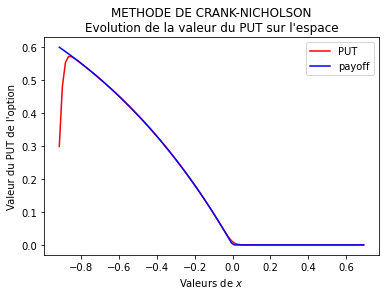

In [133]:
# Affichage de l'évolution du PUT en fonction de x
plt.plot(X_liste, P[- 1, :], color="red", label="PUT")
plt.plot(X_liste, np.fmax(K - np.exp(X_liste), 0), color = "blue", label = "payoff")
plt.xlabel("Valeurs de $x$")
plt.ylabel("Valeur du PUT de l'option")
plt.title("METHODE DE CRANK-NICHOLSON\nEvolution de la valeur du PUT sur l'espace")
plt.legend()
plt.savefig("CN_3.png")
plt.show()

### Affichage de l'évolution du PUT $p(t, x)$ en fonction de $t$ et $x$ (3D)

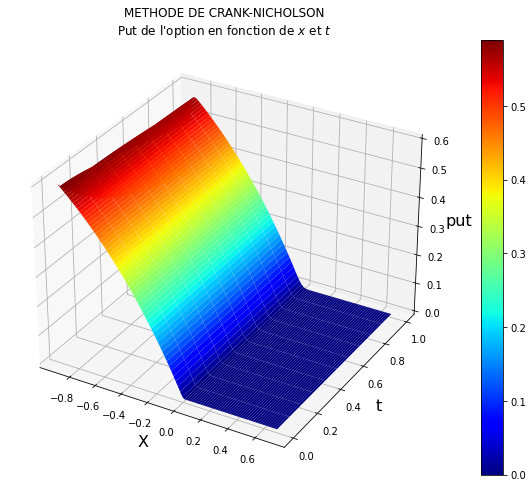

In [126]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize = 16)
ax.set_ylabel('t', fontsize = 16)
ax.set_zlabel('put', fontsize = 16)
X_liste_m, T_liste_m = np.meshgrid(X_liste, T_liste)
p = ax.plot_surface(X_liste_m, T_liste_m, P,cstride=1,linewidth=0,cmap='jet')
cb = fig.colorbar(p, ax=ax)

plt.title("METHODE DE CRANK-NICHOLSON\nPut de l'option en fonction de $x$ et $t$")
plt.savefig("CN_1.png")
plt.show()

### Affichage du PUT $p(t, x)$ en fonction de $t$ et $x$ en vue 2D (heatmap)

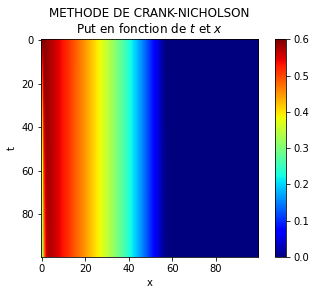

In [129]:
# Affichage en altitude
plt.imshow(P, cmap="jet") #cm.spring)
plt.xlabel("x")
plt.ylabel("t")
plt.title("METHODE DE CRANK-NICHOLSON\nPut en fonction de $t$ et $x$")

plt.colorbar()
plt.savefig("CN_2.png")
plt.show()

### Erreur relative de la méthode

In [85]:
err_abs_nc = np.absolute(P[-1, :] - np.fmax(K - np.exp(X_liste), 0))
err_rel_nc = err_abs_nc/np.fmax(K - np.exp(X_liste), 0)

## Evolution de l'erreur relative suivant les 3 méthodes

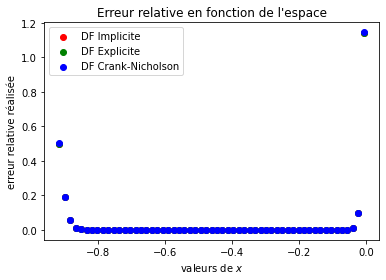

In [118]:
# Affichage de l'évolution de l'erreur relative en fonction de x
plt.scatter(X_liste, err_rel_i, color="red", label="DF Implicite")
plt.scatter(X_liste, err_rel_e, color="green", label="DF Explicite")
plt.scatter(X_liste, err_rel_nc, color="blue", label="DF Crank-Nicholson")
plt.title("Erreur relative en fonction de l'espace")
plt.legend()
plt.xlabel("valeurs de $x$")
plt.ylabel("erreur relative réalisée")
plt.savefig("erreurs.png")
plt.show()

## Courbes de $\mathbf{P}_M$ via les 3 méthodes

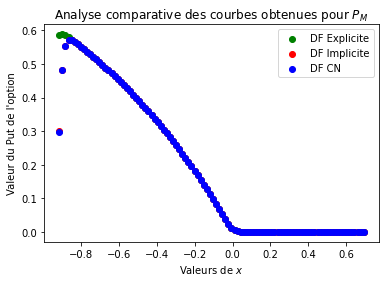

In [119]:
plt.scatter(X_liste, P_E, color='green', label="DF Explicite")
plt.scatter(X_liste, P_I, color='red', label="DF Implicite")
plt.scatter(X_liste, P_CN, color='blue', label="DF CN")
plt.xlabel("Valeurs de $x$")
plt.ylabel("Valeur du Put de l'option")
plt.title("Analyse comparative des courbes obtenues pour $P_M$")
plt.legend()
plt.savefig("courbes.png")
plt.show()

# Annexes techniques

## Algorithme de Thomas

In [121]:
import numpy as np

def TDMA(a,b,c,d):
    n = len(d)
    w= np.zeros(n-1,float)
    g= np.zeros(n, float)
    p = np.zeros(n,float)
    
    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

## Décomposition LU/PLU de la matrice $A$

In [ ]:
# Création de la matrice des p(t_m, x_j)
P = np.zeros((M, N))

# Création des matrices A et B
A = np.zeros((N, N))
B = np.zeros((N, N))

# Remplissage des matrices A et B

    
# Décomposition LU de A
_, L, U = scipy.linalg.lu(A)

""" Résolution du système """

# Discrétisation de l'espace-temps
X_liste = np.linspace(x_min, x_max, N)
T_liste = np.linspace(0, T, M)

# Conditions initiales
for i in range(1, N-1):
    P[0][i] = max(K - np.exp(X_liste[i]), 0)

# Conditions aux limites
for t in range(M):
    P[t][0] = K*np.exp(-r*T_liste[t]) - np.exp(x_min)
    P[t][-1] = 0

# Implémentation du schéma
for t in range(M - 1):
    
    # Etape 1
    y = np.linalg.solve(L, np.dot(B, P[t, :]))
        
    # Etape 2
    P[t + 1, :] = np.linalg.solve(U, y)
#print(P[- 1, :])